# Sales analytics

### Import necessary libraries

In [253]:
import pandas as pd
import os
import numpy as np4
import matplotlib.pyplot as plt


In [201]:
path = r"C:\Users\allo\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')]
print(files)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


### Merging data from each month into one CSV file

In [291]:
df = pd.DataFrame()
for file in files:
    current_data = pd.read_csv(path+"/"+file)
    df = pd.concat([df, current_data])
    
df.to_csv('sales.csv', index = False)
sales = pd.read_csv('sales.csv')

#sales.drop("Unnamed: 0", axis=1)

sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Cleaning up the data !!

The first step in this is figuring out what we need to clean. In practice, you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data.

deleting NaN row values : 

In [221]:
sales = sales[sales['Order Date'].notnull()].reset_index(drop=True)
sales.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


deleting 'Or' values or any indesirable text in our values (but first it needs to be found)  : 

In [222]:
sales = sales[sales['Order Date'].str[0:2] != 'Or']
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## what is the best month in terms of sales? and how much was made during that month ?

Creating a month column from Order Date column using strings manipulation in python:

In [223]:
#sales['month'] = sales[sales['Order Date'].str[0:2]]
sales['month'] = pd.Series([val for val in list(sales['Order Date'].str[0:2])])
sales.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",NaN
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",NaN
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",NaN
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",NaN
186304,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",NaN


Changing column types to the right type so we can perform type-dependant operations on each column :

In [224]:
sales = sales[sales['month'].notnull()].reset_index(drop=True)
sales['month'] = sales['month'].astype(int)
sales['Price Each'] = sales['Price Each'].astype(float)
sales['Quantity Ordered'] = sales['Quantity Ordered'].astype(int)
sales.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
dtype: object

Creating price per order column so we can compare the months : 

In [225]:
sales['price per order'] = pd.Series(val for val in sales['Price Each']*sales['Quantity Ordered'])
sales.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,price per order
185593,259016,AA Batteries (4-pack),1,3.84,09/06/19 17:17,"226 Wilson St, San Francisco, CA 94016",9,3.84
185594,259017,AAA Batteries (4-pack),1,2.99,09/22/19 20:12,"104 9th St, New York City, NY 10001",9,2.99
185595,259018,AA Batteries (4-pack),1,3.84,09/01/19 19:22,"309 Cedar St, New York City, NY 10001",9,3.84
185596,259019,AA Batteries (4-pack),1,3.84,09/10/19 18:37,"46 4th St, San Francisco, CA 94016",9,3.84
185597,259020,Flatscreen TV,1,300.00,09/23/19 12:38,"635 North St, Los Angeles, CA 90001",9,300.00


Grouping data by month and summing over price per order for each month 

In [226]:
results = sales.groupby('month').sum()
print(results)

       Quantity Ordered    Price Each  price per order
month                                                 
1                 10883  1.810144e+06     1.820563e+06
2                 13429  2.188179e+06     2.201306e+06
3                 16956  2.806528e+06     2.822457e+06
4                 20513  3.366169e+06     3.389083e+06
5                 18645  3.109845e+06     3.127335e+06
6                 15217  2.553839e+06     2.569822e+06
7                 16037  2.621672e+06     2.636560e+06
8                 13423  2.222747e+06     2.236319e+06
9                 13081  2.091194e+06     2.104703e+06
10                22680  3.704212e+06     3.724832e+06
11                19747  3.173651e+06     3.192202e+06
12                28063  4.579871e+06     4.605526e+06


Ploting data to get visual understanding of proportions : 

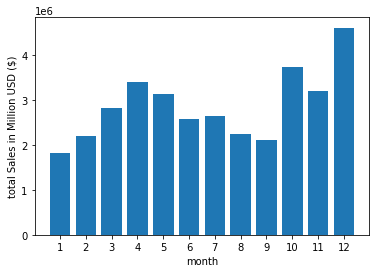

In [250]:
months = range(1,13)
plt.bar(months, results['price per order'])
plt.xticks(months)
plt.ylabel('total Sales in Million USD ($)')
plt.xlabel("month")
plt.show()


## What city scored the highest number of sales?

In [228]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,price per order
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [286]:
sales['cities'] = sales["Purchase Address"].apply(lambda x: x.split(",")[1].strip()+ ' (' + x.split(",")[2][0:3].strip()+ ')')

# sales['city'] = pd.Series([value for value in sales['Purchase Address'].str[10:-6]])
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,price per order,cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [284]:
result = sales.groupby('cities').sum()
print(result)

                      Quantity Ordered    Price Each   month  price per order
cities                                                                       
 Atlanta ( GA)                   16574  2.776179e+06  104609     2.791757e+06
 Austin ( TX)                    11128  1.806886e+06   69609     1.816575e+06
 Boston ( MA)                    22485  3.629325e+06  140834     3.653545e+06
 Dallas ( TX)                    16706  2.750976e+06  104517     2.766273e+06
 Los Angeles ( CA)               33198  5.410445e+06  207725     5.441534e+06
 New York City ( NY)             27880  4.625150e+06  175489     4.654059e+06
 Portland ( ME)                   2746  4.470504e+05   17098     4.496194e+05
 Portland ( OR)                  11289  1.856485e+06   70608     1.866655e+06
 San Francisco ( CA)             50151  8.198273e+06  314949     8.248980e+06
 Seattle ( WA)                   16517  2.727281e+06  104723     2.741710e+06


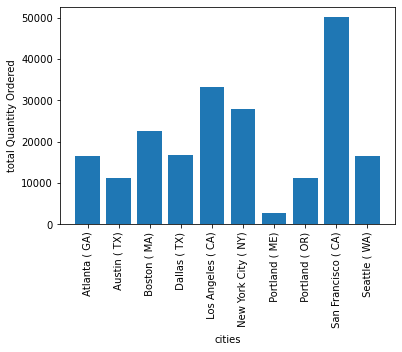

In [285]:
cities = list(result.index)
plt.bar(cities, result['Quantity Ordered'])
plt.xticks(cities,rotation='vertical')
plt.ylabel('total Quantity Ordered')
plt.xlabel("cities")
plt.show()


### What time (hour) is best for displaying advertisement to maximize likelihood of customer's buying product ?